# Курсовая работа по предмету основы теории вероятности и математической статистики

Для работы взят датасет с данными по демографии в РФ за период 1990 - 2017 гг по регионам.
Проанализируем их. Все вместе, а также по отдельным годам - для сравнения.

In [18]:
import pandas as pd
import numpy as np

In [19]:
demography_df = pd.read_csv('russian_demography.csv')
demography_df.head()
demography_df.drop_duplicates()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2263,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2264,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2265,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2266,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


В датасете содержатся столбцы: год (year), название региона (region), естественный прирост населения (npg), уровень рождаемости(birth_rate), уровень смертности (death_rate), общий демографический вес (сколько людей невокингового возраста составляют 100 человек трудоспособного) (gdw), процент городского населения (urbanisation).

Каждый год занимает 85 строк (по количеству субъектов РФ).

Наиболее интересным является столбец естественного прироста населения. Поэтому найдем статистические параметры этих данных.

In [22]:
mean_arr = []
for i in range(0,28):
    npg_mean = demography_df.loc[(i*85):((i+1)*85 - 1),'npg'].mean()
    mean_arr.append(npg_mean)
    print(f'Средний прирост населения в {(i+1990)} году: {npg_mean}')
npg_mean_ = demography_df['npg'].mean()
print(f'Средний прирост населения 1990 - 2017 гг: {npg_mean_}')

Средний прирост населения в 1990 году: 3.582352941176471
Средний прирост населения в 1991 году: 1.8058823529411772
Средний прирост населения в 1992 году: -0.7964705882352939
Средний прирост населения в 1993 году: -3.7094117647058837
Средний прирост населения в 1994 году: -4.710588235294117
Средний прирост населения в 1995 году: -4.474117647058824
Средний прирост населения в 1996 году: -4.550588235294119
Средний прирост населения в 1997 году: -4.243529411764707
Средний прирост населения в 1998 году: -4.639999999999999
Средний прирост населения в 1999 году: -5.736470588235294
Средний прирост населения в 2000 году: -5.912941176470589
Средний прирост населения в 2001 году: -5.988235294117648
Средний прирост населения в 2002 году: -5.941176470588234
Средний прирост населения в 2003 году: -5.428235294117646
Средний прирост населения в 2004 году: -5.63529411764706
Средний прирост населения в 2005 году: -4.863529411764705
Средний прирост населения в 2006 году: -3.302352941176471
Средний прирос

Естественный прирост населения находится в линейной зависимости от уровня рождаемости и смертности.
Поэтому проанализируем, как связан прирост населения с другими характеристиками: общим демографическим весом и уровнем урбанизации.

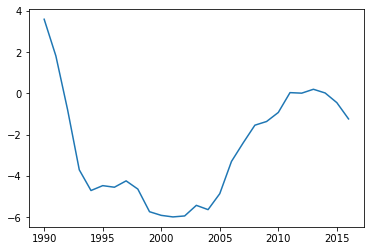

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(1990, 2018), np.array(mean_arr))


In [24]:
demography_df['npg'].describe()

count    2268.000000
mean       -2.693210
std         5.515625
min       -15.900000
25%        -6.300000
50%        -3.200000
75%         0.600000
max        19.900000
Name: npg, dtype: float64

In [25]:
demography_df['gdw'].describe()

count    2268.000000
mean       68.202443
std        10.373001
min        37.500000
25%        61.185000
50%        68.200000
75%        76.495000
max        95.050000
Name: gdw, dtype: float64

In [26]:
demography_df['urbanization'].describe()

count    2268.000000
mean       69.913276
std        12.510606
min        23.630000
25%        63.540000
50%        69.895000
75%        77.732500
max       100.000000
Name: urbanization, dtype: float64

In [27]:
corr_matrix_gdw = demography_df.loc[:, ['npg', 'gdw']].corr()
corr_matrix_urb = demography_df.loc[:, ['npg', 'urbanization']].corr()
#coef_gdw = corr_matrix_gdw.loc['npg', 'gdw']
#coef_urb = corr_matrix_urb.loc['npg', 'urbanization']
#print(f'Коэффициенты корреляции прироста населения с демографическим весом и уровнем урбанизации {coef_gdw, coef_urb}')
corr_matrix_gdw, corr_matrix_urb

(          npg       gdw
 npg  1.000000 -0.195547
 gdw -0.195547  1.000000,
                    npg  urbanization
 npg           1.000000     -0.222125
 urbanization -0.222125      1.000000)

Можно сделать вывод, что прирост населения коррелирует с этими величинами в обратной зависимости.
То есть, чем меньше неработающих приходится на работающих и чем меньше уровень урбанизации - тем больше прирост населения.
Причем статистическая взаимосвязь прироста населения с уровнем урбанизации больше вдвое, чем с демографическим весом.

Посчитаем ковариацию.

In [28]:
X = demography_df['npg']
Y1 = demography_df['gdw']
Y2 = demography_df['urbanization']

MX = X.mean()
MY1 = Y1.mean()
MY2 = Y2.mean()

cov1 = ((X - MX) * (Y1 - MY1)).sum() / (X.shape[0] - 1)
cov2 = ((X - MX) * (Y2 - MY2)).sum() / (X.shape[0] - 1)

print(cov1, cov2)

-11.187957484465791 -15.327474834855439


Разброс величин:

In [29]:
X.var(ddof=1), Y1.var(ddof=1), Y2.var(ddof=1)

(30.42211532073182, 107.5991430381775, 156.51526579585985)

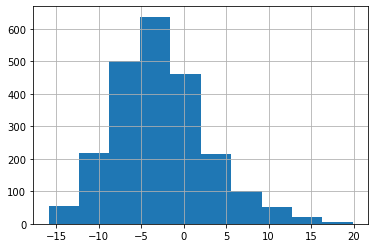

In [30]:
hx = X.hist()
fig = hx.get_figure()

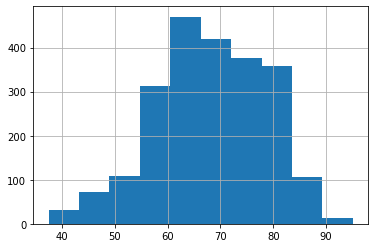

In [31]:
hy1 = Y1.hist()
fig = hy1.get_figure()

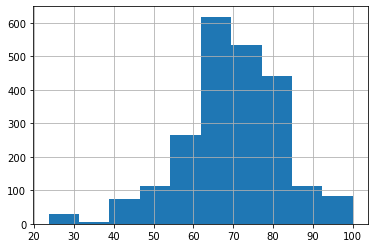

In [32]:
hy2 = Y2.hist()
fig = hy2.get_figure()

Видим, что сходство с распределением Гаусса не настолько сильно, чтобы воспользоваться методами для нормального распределения.

Посчитаем коэффициент Кендалла.

In [33]:
demography_df.corr(method='kendall')

,year,npg,birth_rate,death_rate,gdw,urbanization
year,1.000000,0.086972,0.252182,0.051709,-0.206203,0.023906
npg,0.086972,1.000000,0.683878,-0.737808,-0.131288,-0.100936
birth_rate,0.252182,0.683878,1.000000,-0.415712,-0.150450,-0.137313
death_rate,0.051709,-0.737808,-0.415712,1.000000,0.079738,0.056544
gdw,-0.206203,-0.131288,-0.150450,0.079738,1.000000,-0.211265
urbanization,0.023906,-0.100936,-0.137313,0.056544,-0.211265,1.000000


Попробуем посмотреть на данные в срезе для одного года (1990, 2002, 2013, 2017).
Вид распределения не Гауссов.

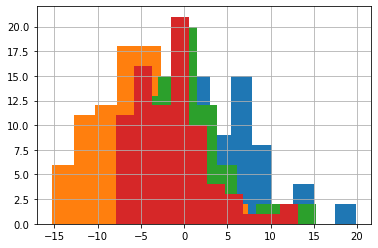

In [34]:
for i in [0, 12, 23, 27]:
    h_ = demography_df.loc[(i*81):((i+1)*81 - 1),'npg'].hist()
    fig = h_.get_figure()

Корреляция прироста населения с общим демографическим весом и с урбанизацией по годам.

In [58]:
for i in [0, 12, 23, 27]:
    corr_matrix_ken = demography_df.loc[(i*81):((i+1)*81 - 1), ['npg', 'gdw', 'urbanization']].corr(method = 'kendall')
    print(1990+i)
    print(corr_matrix_ken)
    print("*" * 50)

1990
                   npg       gdw  urbanization
npg           1.000000 -0.298638     -0.092318
gdw          -0.298638  1.000000     -0.485485
urbanization -0.092318 -0.485485      1.000000
**************************************************
2002
                   npg       gdw  urbanization
npg           1.000000 -0.373627     -0.123763
gdw          -0.373627  1.000000     -0.352432
urbanization -0.123763 -0.352432      1.000000
**************************************************
2013
                   npg       gdw  urbanization
npg           1.000000 -0.455427     -0.110352
gdw          -0.455427  1.000000     -0.137952
urbanization -0.110352 -0.137952      1.000000
**************************************************
2017
                   npg       gdw  urbanization
npg           1.000000 -0.469078     -0.044996
gdw          -0.469078  1.000000     -0.126778
urbanization -0.044996 -0.126778      1.000000
**************************************************


Проанализируем данные и узнаем:
    
1. Была ли в 1990 и в 2017 годах значима связь между приростом населения и демографическим показателем и уровнем урбанизации. ('npg', 'gdw', 'urbanization')

2. Как изменились найденные статистические параметры за 27 лет.



Исследуем связь между приростом населения и демографическим показателем и уровнем урбанизации в 1990 году.



In [64]:
x_1 = demography_df.loc[0:81, ['gdw','urbanization']].values
y_1 = demography_df.loc[0:81, ['npg']].values
ones = np.ones((x_1.shape[0], 1))
x_1 = np.hstack((ones, x_1))
XTX = x_1.T.dot(x_1)
np.linalg.det(XTX)

4618956803.130585

In [65]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x_1.T).dot(y_1)
print(f'b = {b}')

def sum_of_squares(samples):
    return ((samples - samples.mean())**2).sum()

z_1 = x_1.dot(b)
R2 = 1 - ((y_1 - z_1)**2).sum() / sum_of_squares(y_1)
print(f'R2 = {R2}')

from scipy import stats

n = x_1.shape[0]
m = x_1.shape[1] - 1

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)

print(f't = {t}')

F = (R2 / k1) / ((1 - R2) / k2)
print(f'F = {F}')

b = [[52.40174935]
 [-0.39568532]
 [-0.26956661]]
R2 = 0.400272862278369
t = 3.112259573460637
F = 26.363286010469476


Уравнение линейной регрессии имеет вид: 
    
    у = 52.4 - 0.39 * х1 - 0.26 * х2

F > t. Статистика попала в критическую область, следовательно уравнение регрессии признается значимым.

Рассмотрим связь между приростом населения и демографическим показателем и урбанизацией в 2017 году

In [47]:
x_2 = demography_df.loc[27*81:28*81-1, ['gdw', 'urbanization']].values
y_2 = demography_df.loc[27*81:28*81-1, ['npg']].values
ones = np.ones((x_2.shape[0], 1))
x_2 = np.hstack((ones, x_2))
XTX = x_2.T.dot(x_2)
np.linalg.det(XTX)

3036375256.613951

Определитель не близок к 0, поэтому продолжим работу по этому методу.

In [50]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x_2.T).dot(y_2)
b

array([[41.73379069],
       [-0.44078092],
       [-0.12713382]])

In [51]:
z_2 = x_2.dot(b)
R2 = 1 - ((y_2 - z_2)**2).sum() / sum_of_squares(y_2)
R2

0.457927544960378

Проверим значимость найденного уравнения регрессии.

In [52]:
from scipy import stats

n = x_2.shape[0]
m = x_2.shape[1] - 1

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)

print(f't = {t}')

t = 3.1137922602848125


In [53]:
F = (R2 / k1) / ((1 - R2) / k2)
print(f'F = {F}')

F = 32.946101738649226


F > t. Статистика попала в критическую область, следовательно уравнение регрессии признается значимым.

In [62]:
import statsmodels.api as sm
    
model1 = sm.OLS(y_1, x_1)
results1 = model1.fit()
print(results1.summary())    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     26.56
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.28e-09
Time:                        16:31:20   Log-Likelihood:                -234.56
No. Observations:                  85   AIC:                             475.1
Df Residuals:                      82   BIC:                             482.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8294      6.633      7.814      0.0

In [63]:
model2 = sm.OLS(y_2, x_2)
results2 = model2.fit()
    
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     32.95
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           4.25e-11
Time:                        16:31:39   Log-Likelihood:                -206.52
No. Observations:                  81   AIC:                             419.0
Df Residuals:                      78   BIC:                             426.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7338      5.326      7.836      0.0

Итак, уравнение линейной регрессии имеет вид:

    у = 41.73 - 0.44 * х1 - 0.12 * х2 (2017 г.)

где у - естественный прирост населения,
х1 - общий демографический показатель,
х2 - уровень урбанизации.

Сравним с другим уравнением регрессии:

     у = 51.83 - 0.39 * х1 - 0.26 * х2 (1990 г.)

Оба уравнения значимы для построения линейной зависимости.
По сравнению с уравнением 1990 года коэффициент b0 уменьшился, b1 по модулю увеличился, b2 по модулю уменьшился

 В выборке из данных по 4 годам в 1990 году наблюдается корреляция между общим демографическим показателем и уровнем урбанизации.
    Проанализируем, есть ли между ними взаимосвязь.

In [69]:
x_3 = demography_df.loc[0:81, ['urbanization']].values
y_3 = demography_df.loc[0:81, ['gdw']].values
ones = np.ones((x_3.shape[0], 1))
x_3 = np.hstack((ones, x_3))


model3 = sm.OLS(y_3, x_3)
results3 = model3.fit()
    
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     44.07
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           3.49e-09
Time:                        17:05:52   Log-Likelihood:                -280.18
No. Observations:                  82   AIC:                             564.4
Df Residuals:                      80   BIC:                             569.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.5581      4.694     22.701      0.0

 В выборке из данных по 4 годам наблюдается возрастающая корреляция между общим демографическим показателем и приростом населения.
    Проанализируем, есть ли между ними взаимосвязь.

In [70]:
x_4 = demography_df.loc[27*81:28*81-1, ['gdw']].values
y_4 = demography_df.loc[27*81:28*81-1, ['npg']].values
ones = np.ones((x_4.shape[0], 1))
x_4 = np.hstack((ones, x_4))


model4 = sm.OLS(y_4, x_4)
results4 = model4.fit()
    
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     38.96
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.02e-08
Time:                        17:09:41   Log-Likelihood:                -215.08
No. Observations:                  81   AIC:                             434.2
Df Residuals:                      79   BIC:                             439.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.9002      4.679      5.963      0.0

Выводы:

1. В 2017 году прирост населения по сравнению с 1990 годом снизился и стал отрицательным. В 2001 году наблюдался локальный минимум данной величины: спад до -5.9882 на 1000 человек населения (средняя величина по всем регионам). В 2013 году - локальный максимум: +0.1917 человека на 1000 населения.

2. Коэффициенты детерминации R2, равные 0.3931 и 0.4579 означают, что 39% и 45% дисперсии переменной y соответственно - учитывается или объясняется моделью. Оставшиеся 61% и 55% соответственно - обусловлены какими-то ещё факторами, которые при построении модели не учитывались. 

3. Доверительные интервалы коэффициента b0 заметно больше, чем коэффициенты  b1, b2 при переменных, это свидетельствует о том, что всё-таки общий демографический показатель и уровень урбанизации не вносят большого отрицательного вклада (отрицательного) в уровень естественного прироста населения.

4. Однако, если сравнить оба уравнения регрессии между собой, то увидим, что в 2017 году по сравнению с 1990 годом для естественного прироста населения - уровень урбанизации стал менее значим, а общий демографический показатель - стал немного более значим.

5. В 1990 году была корреляция между общим демографическим показателем и уровнем урбанизации (-0.485). Построенная модель линейной регрессии говорит в частности о том, что понижение урбанизации на 1 вело к снижению демографического показателя на 0.44. Небольшой доверительный интервал при переменной говорит о небольшом вкладе урбанизации и демогр. показатель.

6. В выборке из данных по 4 годам наблюдается возрастающая корреляция между общим демографическим показателем и приростом населения. В 2017 этот уровень наиболее высок (- 0.469) и прослежена небольшая линейная зависимость между этими величинами. Что интерпретируется следующим образом: повышение количества неработающих жителей по отношению к работающим на 1 человека ведет к уменьшению населения на 0.3783 (около 4 на каждые 10 человек). Малый доверительный интервал при переменной говорит о малом вкладе демогр.показателя в величину естественного прироста населения.